<a href="https://colab.research.google.com/github/mipypf/scej-mi/blob/develop/example_brics_smarts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit==2024.3.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 14.0 MB/s eta 0:00:00


In [15]:
from rdkit.Chem import AllChem, Draw
from rdkit import Chem
from rdkit.Chem import Descriptors
# https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/Recap.py
# Recapでは11種類のフラグメント、BRICSでは16種類のフラグメント
from rdkit.Chem import Recap, BRICS, rdChemReactions
from rdkit import RDLogger
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")

RDLogger.DisableLog('rdApp.*')

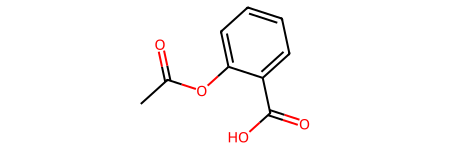

In [3]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"  # アセチルサリチル酸
mol = Chem.MolFromSmiles(smiles)
mol

In [4]:
recap_tree = Recap.RecapDecompose(mol)
recap_tree

In [5]:
# フラグメント（終端ノード）の取得
fragments = list(recap_tree.GetLeaves().keys())
fragments

['*C(C)=O', '*O', '*Oc1ccccc1C(*)=O', '*C(=O)c1ccccc1*']

In [6]:
fragment_mols = [Chem.MolFromSmiles(f) for f in fragments]
fragment_mols

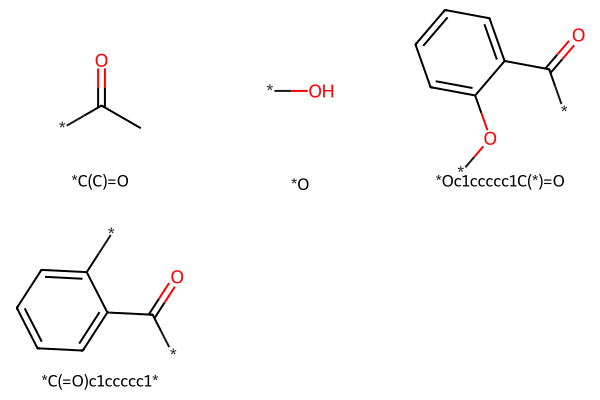

In [7]:
# フラグメントの描画
Draw.MolsToGridImage(fragment_mols, molsPerRow=3, subImgSize=(200,200), legends=fragments)

In [8]:
fragments_brics = BRICS.BRICSDecompose(mol)
fragments_brics

{'[1*]C(C)=O', '[16*]c1ccccc1[16*]', '[3*]O[3*]', '[6*]C(=O)O'}

In [9]:
fragment_mols_brics = [Chem.MolFromSmiles(f) for f in fragments_brics]
fragment_mols_brics

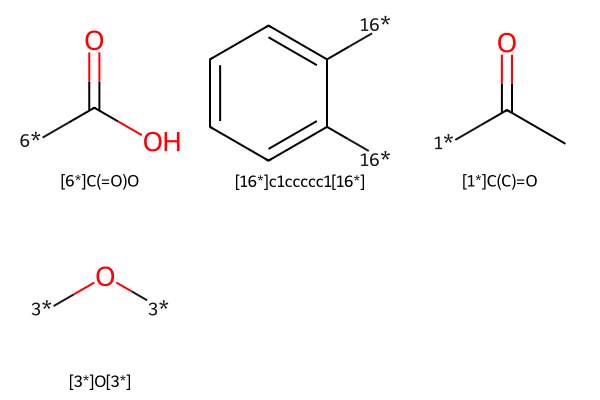

In [10]:
# フラグメントの描画
Draw.MolsToGridImage(fragment_mols_brics, molsPerRow=3, subImgSize=(200,200), legends=fragments_brics)

In [13]:
smarts = Chem.MolToSmarts(mol)
smarts

'[#6]-[#6](=[#8])-[#8]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#6](=[#8])-[#8]'

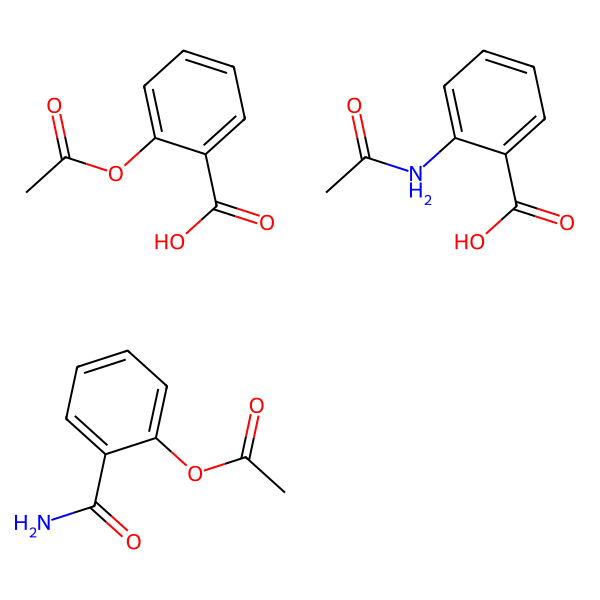

In [17]:
# 反応SMARTS形式で定義
# C:1	カルボニルCは反応前後で変化しないため同じ番号に固定
# O:2 / NH2:2	Oが除かれ、NH₂に置換 → 同じ番号で「置換対象の対」を表す
rxn = rdChemReactions.ReactionFromSmarts("[C:1](=O)[O:2]>>[C:1](=O)[NH2:2]")

# 反応を適用
products = rxn.RunReactants((mol,))

# 結果をMolとして取得（重複排除）
product_mols = list({Chem.MolToSmiles(p[0]): p[0] for p in products}.values())

# 描画
Draw.MolsToGridImage([mol] + product_mols, molsPerRow=2, subImgSize=(300, 300))